In [296]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [297]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-01-02 08:10:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-01-02 08:10:52 (16.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [298]:
dataset = pd.read_csv('loan_train.csv')

In [299]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [300]:
dataset.shape

(346, 10)

In [301]:
dataset.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [302]:
drop_columns = ["Unnamed: 0", "Unnamed: 0.1"]
dataset.drop(labels= drop_columns, axis=1, inplace=True)

In [303]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [304]:
dataset.shape

(346, 8)

In [305]:
dataset.dtypes

loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [306]:
dataset['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [307]:
dataset['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [308]:
dataset['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [309]:
# z = dataset.iloc[:, 0:1].values

In [310]:
# Any text data needs to be converted into numbers that our model can use,
# We'll also fill any empty cells with 0:

# dataset = pd.get_dummies(dataset, columns=["education"])
# dataset.fillna(value=0.0, inplace=True)

In [311]:
# Any text data needs to be converted into numbers that our model can use,
# We'll also fill any empty cells with 0:

# dataset = pd.get_dummies(dataset, columns=["Gender"])
# dataset.fillna(value=0.0, inplace=True)

In [312]:
# Any text data needs to be converted into numbers that our model can use,
# We'll also fill any empty cells with 0:

# dataset = pd.get_dummies(dataset, columns=["loan_status"])
# dataset.fillna(value=0.0, inplace=True)

In [313]:
dataset['due_date'] = pd.to_datetime(dataset['due_date'])
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'])

In [314]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [315]:
dataset.shape

(346, 8)

In [316]:
dataset.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [317]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

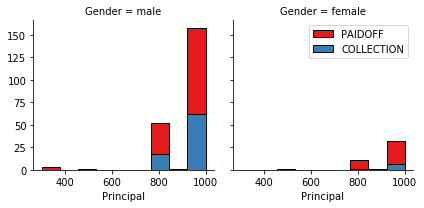

In [318]:
import seaborn as sns

bins = np.linspace(dataset.Principal.min(), dataset.Principal.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

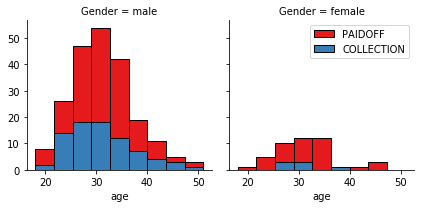

In [319]:
bins = np.linspace(dataset.age.min(), dataset.age.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction

Lets look at the day of the week people get the loan

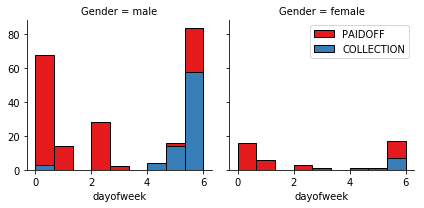

In [320]:
dataset['dayofweek'] = dataset['effective_date'].dt.dayofweek
bins = np.linspace(dataset.dayofweek.min(), dataset.dayofweek.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [321]:
dataset['weekend'] = dataset['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [322]:
dataset.shape

(346, 10)

# Convert Categorical features to numerical values

In [323]:
# Lets look at gender:
dataset.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [324]:
# Lets convert male to 0 and female to 1:
dataset['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [325]:
dataset['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [326]:
dataset['Gender'] = dataset['Gender'].astype('float')
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0.0,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1.0,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0.0,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,college,1.0,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,college,0.0,4,1


In [327]:
dataset['Gender'] = dataset['Gender'].astype('int')
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# One Hot Encoding

How about education?

In [328]:
dataset.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

In [329]:
# dataset[['loan_status','Principal','terms','age','Gender','education']].head()

In [330]:
dataset[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [331]:
Feature = dataset[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(dataset['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [332]:
# dataset = Feature

In [333]:
# dataset.head()

# Feature selection

Lets defind feature sets, X:

In [334]:
# X = dataset
# X[0:5]

In [335]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [336]:
y = dataset['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

# Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [337]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [338]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

In [339]:
# dataset_test = pd.read_csv('loan_test.csv')

In [340]:
# dataset_test.head()

In [341]:
# drop_columns = ["Unnamed: 0", "Unnamed: 0.1","due_date","effective_date"]
# dataset_test.drop(labels= drop_columns, axis=1, inplace=True)

In [342]:
# dataset_test.shape

In [343]:
## Lets convert male to 0 and female to 1:
# dataset_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# dataset_test.head()

In [344]:
# dataset_test['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
# dataset_test.head()

In [345]:
# Feature_test = dataset_test[['loan_status','Principal','terms','age','Gender']]
# Feature_test = pd.concat([Feature_test,pd.get_dummies(dataset_test['education'])], axis=1)
# Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
# Feature_test.head()

In [346]:
# dataset_test = Feature_test

In [347]:
# dataset_test['education'].replace(to_replace=['Bechalor','Master or Above','High School or Below','college'], value=[0,1,2,3],inplace=True)
# dataset_test.head()

In [348]:
## dataset_test['loan_status'] = dataset_test['loan_status'].astype('float')
# dataset_test.head()

In [349]:
# dataset_test.shape

In [350]:
# X_train=dataset.iloc[:,1:8]
# y_train=dataset.iloc[:,0:1]

In [351]:
# X_test = dataset_test.iloc[:,1:8]

# K Nearest Neighbor(KNN)

In [352]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [353]:
# Preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [354]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [355]:
y_pred = classifier.predict(X_test)

In [356]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[47  8]
 [10  5]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.38      0.33      0.36        15

   micro avg       0.74      0.74      0.74        70
   macro avg       0.60      0.59      0.60        70
weighted avg       0.73      0.74      0.74        70

0.7428571428571429


In [357]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

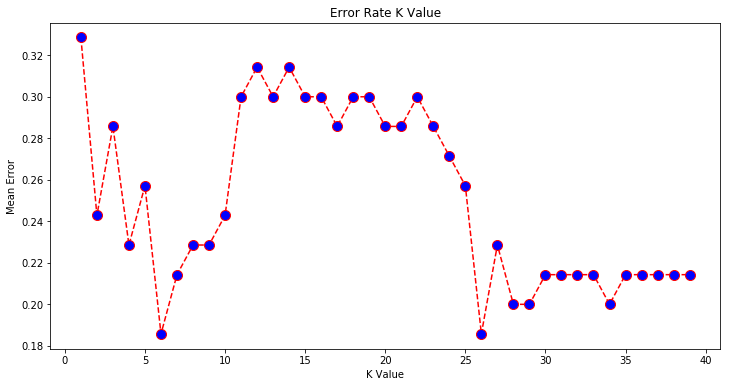

In [358]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
       markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [359]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [360]:
y_pred = classifier.predict(X_test)

In [361]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8142857142857143


The best accuracy is 100% when k = 33

# Decision Tree

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [363]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
classifier # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [364]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction

Let's make some predictions on the testing dataset and store it into a variable called y_pred

In [365]:
D_pred = classifier.predict(X_test)

# Evaluation

Next, let's import metrics from sklearn and check the accuracy of our model.

In [366]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, D_pred))

DecisionTrees's Accuracy:  0.7884615384615384


# Support Vector Machine

In [367]:
##  the model_selection library of the Scikit-Learn library contains the train_test_split
## method that allows us to seamlessly divide data into training and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 10)

In [368]:
# Training the Algorithm

from sklearn.svm import SVC   # Support Vector Classifier
classifier = SVC(kernel='linear')#This class takes one parameter,which is the kernel type
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [369]:
SVM_pred = classifier.predict(X_test)

In [370]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,SVM_pred))
print(classification_report(y_test,SVM_pred))
print(accuracy_score(y_test, SVM_pred))

[[56  0]
 [14  0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        56
           1       0.00      0.00      0.00        14

   micro avg       0.80      0.80      0.80        70
   macro avg       0.40      0.50      0.44        70
weighted avg       0.64      0.80      0.71        70

0.8


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Kernel SVM

 Polynomial Kernel

In [371]:
# Polynomial Kernel
from sklearn.svm import SVC   # Support Vector Classifier
classifier = SVC(kernel ='poly', degree= 8)
classifier.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [372]:
y_pred = classifier.predict(X_test)

In [373]:
## Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[54  2]
 [14  0]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        56
           1       0.00      0.00      0.00        14

   micro avg       0.77      0.77      0.77        70
   macro avg       0.40      0.48      0.44        70
weighted avg       0.64      0.77      0.70        70

0.7714285714285715


In [374]:
# from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss
# print(jaccard_similarity_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))

In [375]:
# from sklearn.metrics import jaccard_similarity_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import log_loss

In [376]:
# Gaussian Kernel
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [377]:
y_pred = classifier.predict(X_test)

In [378]:
## Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[54  2]
 [13  1]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        56
           1       0.33      0.07      0.12        14

   micro avg       0.79      0.79      0.79        70
   macro avg       0.57      0.52      0.50        70
weighted avg       0.71      0.79      0.73        70

0.7857142857142857


In [379]:
# from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss
# print(jaccard_similarity_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))
# print(log_loss(y_test, y_pred)

In [380]:
# Sigmoid Kernel
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [381]:
y_pred = classifier.predict(X_test)

In [382]:
## Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[53  3]
 [12  2]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        56
           1       0.40      0.14      0.21        14

   micro avg       0.79      0.79      0.79        70
   macro avg       0.61      0.54      0.54        70
weighted avg       0.73      0.79      0.74        70

0.7857142857142857


In [383]:
# from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss
# print(jaccard_similarity_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))
# print(log_loss(y_test, y_pred)

# Logistic Regression

In [384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [385]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [386]:
LR_pred = LR.predict(X_test)

In [387]:
## Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, LR_pred))
print(classification_report(y_test, LR_pred))
print(accuracy_score(y_test, LR_pred))

[[56  0]
 [14  0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        56
           1       0.00      0.00      0.00        14

   micro avg       0.80      0.80      0.80        70
   macro avg       0.40      0.50      0.44        70
weighted avg       0.64      0.80      0.71        70

0.8


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Evaluation using Test set

### Load Test set for evaluation

In [388]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [389]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-01-02 08:11:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-01-02 08:11:28 (406 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [390]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [391]:
drop_columns = ["Unnamed: 0", "Unnamed: 0.1"]
test_df.drop(labels= drop_columns, axis=1, inplace=True)

In [392]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [393]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [394]:
## Lets convert male to 0 and female to 1:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0


In [395]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,0,1000,30,2016-09-10,2016-10-09,26,college,0
4,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0


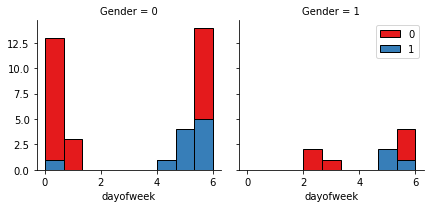

In [396]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [397]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,0,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [398]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [399]:
X_test = Feature_test
y_test = test_df['loan_status'].values
X_test[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [400]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [411]:
# KNN

# re-run the model, and calculate accuracy with the test set
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN_yhat = neigh.predict(X_test)

# Evaluate prediction accuracy
KNN_jaccard = jaccard_similarity_score(y_test, KNN_yhat)
KNN_f1 = f1_score(y_test, KNN_yhat, average='weighted')
print("KNN Jaccard: ", round(KNN_jaccard,3))
print("KNN f1: ", round(KNN_f1,3))

KNN Jaccard:  0.778
KNN f1:  0.743


In [415]:
# Decision Tree
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
Tree.fit(X_train,y_train)
# Prediction accuracy
predTree = Tree.predict(X_test)
# Evaluate prediction accuracy
DecisionTree_jaccard = jaccard_similarity_score(y_test, predTree)
DecisionTree_f1 = f1_score(y_test, predTree, average='weighted')
print("DT Jaccard: ", round(DecisionTree_jaccard,3))
print("DT f1: ", round(DecisionTree_f1,3))

DT Jaccard:  0.759
DT f1:  0.672


In [420]:
# Support Vector Machine

clf = SVC(kernel='sigmoid')#This class takes one parameter,which is the kernel type
clf.fit(X_train, y_train)
# Prediction accuracy
yhat = clf.predict(X_test)
# Evaluate prediction accuracy
SVM_jaccard = jaccard_similarity_score(y_test, yhat)
SVM_f1 = f1_score(y_test, yhat, average='weighted')
print("SVM Jaccard: ", round(SVM_jaccard,3))
print("SVM Machine f1: ", round(SVM_f1,3))

SVM Jaccard:  0.741
SVM Machine f1:  0.66


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [421]:
# Logistic Regression

# Prediction accuracy
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
# Evaluate prediction accuracy
LR_jaccard = jaccard_similarity_score(y_test, yhat)
LR_f1 = f1_score(y_test, yhat, average='weighted')
LR_logLoss = log_loss(y_test, yhat_prob)
print("LR Jaccard: ", round(LR_jaccard,3))
print("LR f1: ", round(LR_f1,3))
print("LR LogLoss: ", round(LR_logLoss,3))

LR Jaccard:  0.741
LR f1:  0.63
LR LogLoss:  0.573


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:

In [422]:
Report = pd.DataFrame({"Algorithm":["KNN","Decision Tree","SVM","LogisticRegression"], "Jaccard":[KNN_jaccard,DecisionTree_jaccard,SVM_jaccard,LR_jaccard], "F1-score":[KNN_f1,DecisionTree_f1,SVM_f1,LR_f1], "LogLoss":["NA","NA","NA",LR_logLoss]})
print(Report)

            Algorithm   Jaccard  F1-score   LogLoss
0                 KNN  0.777778  0.743434        NA
1       Decision Tree  0.759259  0.671764        NA
2                 SVM  0.740741  0.660427        NA
3  LogisticRegression  0.740741  0.630418  0.572856


In [ ]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
# dataset = pd.read_csv(url, names=names)

# https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/0809c485-d73c-4331-a912-a45375a66171?projectid=685b646c-3120-4a27-823f-2c105dfc0dd5&context=wdp

# https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/0809c485-d73c-4331-a912-a45375a66171/view?access_token=6e36ce77b9d9022c016017dfd390862689b79db8143150b8ee5c70b582322323

# http://localhost:8888/notebooks/Desktop/ML0101EN-Proj-Loan-py-v1.ipynb#Lets-look-at-the-day-of-the-week-people-get-the-loan

# https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/0a0bcb49-5acb-415e-a40d-cd3837251257/view?access_token=ad9103403e72e868d0a0890bf304e5f92e3c67603dcfa8e11a8d6d9c74c5450f

# https://eu-gb.dataplatform.cloud.ibm.com/analytics/notebooks/v2/2d15ae45-e78a-45e1-85e0-35b02d70c384/view?access_token=b6ded40d25341ad5f4e2e929cf4b8d10e17f829d9aaa9b2201ce508c3153cba9